# Analyzing Outliers

# Outlier Analysis 

In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.


Our Target Variable is Item_Outlet_Sales so let us find its outliers, first

 Below Figure i.e. Box plot of data from the Michelson–Morley experiment displaying four outliers in the middle column, as well as one outlier in the first column.

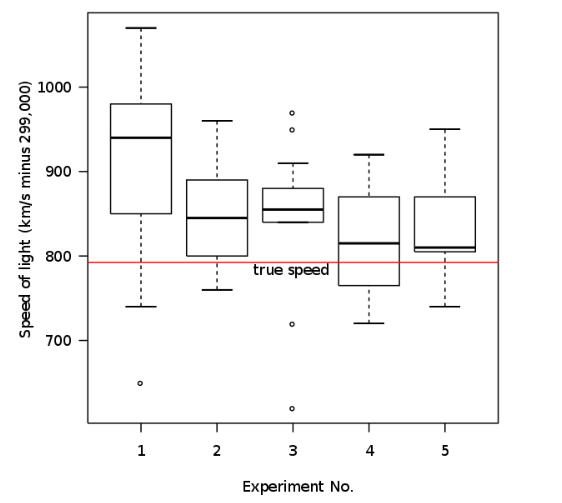

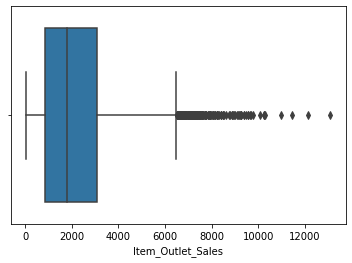

In [ ]:
sns.boxplot(x=df['Item_Outlet_Sales'])
plt.show()

From the above plot we can the outer dots, which are the outliers.

Now lets try to identify Outliers using Statistical <b> Z Score Method</b>. 
Any z-score greater than 3 or less than -3 is considered to be an outlier. This rule is based on the empirical rule, that states that almost all of the data (99.7%) should be within three standard deviations from the mean.

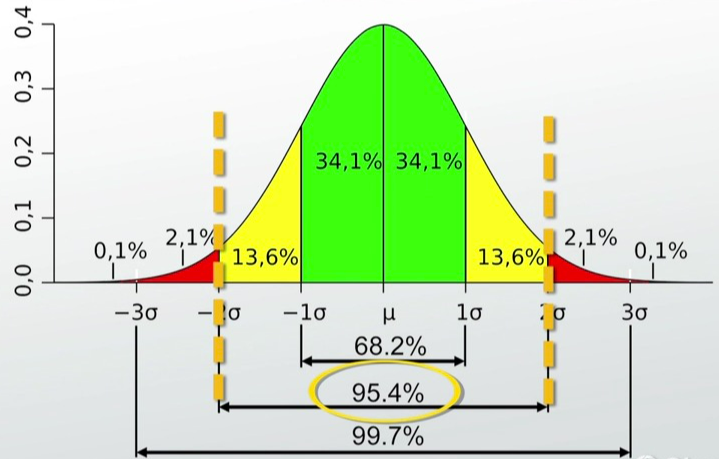

In [ ]:
# import Statistic library to use zscore method
from scipy import stats

In [ ]:
# using z score to detect outliers  (zscore > 3 is an outlier)
# we use scipy stasts package to get z score.
z = np.abs(stats.zscore(df.Item_Outlet_Sales))
z.shape

(8523,)

In [ ]:
print(z)

0       0.910601
1       1.018440
2       0.049238
3       0.849103
4       0.695373
          ...   
8518    0.349915
8519    0.956402
8520    0.579100
8521    0.196725
8522    0.829594
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [ ]:
np.where(z > 3)
print (z[130])

3.3913544171949606


In [ ]:
threshold=3
outliers=np.where(z > threshold)

In [ ]:
outliers

(array([ 130,  145,  276,  304,  333,  373,  456,  472,  661,  694,  753,
         809,  935,  991,  997, 1009, 1138, 1254, 1450, 1506, 1859, 1998,
        2109, 2216, 2238, 2293, 2516, 2535, 2776, 3083, 3087, 3098, 3154,
        3234, 3286, 3407, 3667, 3709, 3720, 3757, 4289, 4346, 4349, 4676,
        4681, 4772, 4888, 4961, 4991, 5065, 5177, 5185, 5223, 5315, 5500,
        5550, 5619, 5752, 5799, 5812, 5977, 6000, 6134, 6334, 6409, 6537,
        6541, 6606, 6886, 6993, 7016, 7076, 7188, 7191, 7236, 7256, 7302,
        7343, 7560, 7562, 7609, 7690, 7752, 7816, 7826, 7930, 8039, 8201,
        8245, 8447]),)

In [ ]:
len(outliers)

1

In [ ]:
O=outliers[0]

In [ ]:
print(O)

[ 130  145  276  304  333  373  456  472  661  694  753  809  935  991
  997 1009 1138 1254 1450 1506 1859 1998 2109 2216 2238 2293 2516 2535
 2776 3083 3087 3098 3154 3234 3286 3407 3667 3709 3720 3757 4289 4346
 4349 4676 4681 4772 4888 4961 4991 5065 5177 5185 5223 5315 5500 5550
 5619 5752 5799 5812 5977 6000 6134 6334 6409 6537 6541 6606 6886 6993
 7016 7076 7188 7191 7236 7256 7302 7343 7560 7562 7609 7690 7752 7816
 7826 7930 8039 8201 8245 8447]


In [ ]:
len(O)

90

# This means there are 90 outliers present in the data. 

Next step will be to remove these outlers from that data.

# Removing Outliers

In [ ]:
O

array([ 130,  145,  276,  304,  333,  373,  456,  472,  661,  694,  753,
        809,  935,  991,  997, 1009, 1138, 1254, 1450, 1506, 1859, 1998,
       2109, 2216, 2238, 2293, 2516, 2535, 2776, 3083, 3087, 3098, 3154,
       3234, 3286, 3407, 3667, 3709, 3720, 3757, 4289, 4346, 4349, 4676,
       4681, 4772, 4888, 4961, 4991, 5065, 5177, 5185, 5223, 5315, 5500,
       5550, 5619, 5752, 5799, 5812, 5977, 6000, 6134, 6334, 6409, 6537,
       6541, 6606, 6886, 6993, 7016, 7076, 7188, 7191, 7236, 7256, 7302,
       7343, 7560, 7562, 7609, 7690, 7752, 7816, 7826, 7930, 8039, 8201,
       8245, 8447])

In [ ]:
df_outlier_filtered=pd.DataFrame().reindex_like(df)
#Let us store outliers seperately and then drop from main data
for  i in O :
    df_outlier_filtered.iloc[df[df.rowno == i].index]= df[df.rowno == i]
    df.drop(df[df.rowno == i].index, inplace=True)

In [ ]:
#print final result of
print(df_outlier_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            90 non-null     object 
 1   Item_Weight                90 non-null     float64
 2   Item_Fat_Content           90 non-null     object 
 3   Item_Visibility            90 non-null     float64
 4   Item_Type                  90 non-null     object 
 5   Item_MRP                   90 non-null     float64
 6   Outlet_Identifier          90 non-null     object 
 7   Outlet_Establishment_Year  90 non-null     object 
 8   Outlet_Size                77 non-null     object 
 9   Outlet_Location_Type       90 non-null     object 
 10  Outlet_Type                90 non-null     object 
 11  Item_Outlet_Sales          90 non-null     float64
 12  rowno                      90 non-null     float64
dtypes: float64(5), object(8)
memory usage: 1.2+ MB
N

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8433 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8433 non-null   object 
 1   Item_Weight                8433 non-null   float64
 2   Item_Fat_Content           8433 non-null   object 
 3   Item_Visibility            8433 non-null   float64
 4   Item_Type                  8433 non-null   object 
 5   Item_MRP                   8433 non-null   float64
 6   Outlet_Identifier          8433 non-null   object 
 7   Outlet_Establishment_Year  8433 non-null   object 
 8   Outlet_Size                6036 non-null   object 
 9   Outlet_Location_Type       8433 non-null   object 
 10  Outlet_Type                8433 non-null   object 
 11  Item_Outlet_Sales          8433 non-null   float64
 12  rowno                      8433 non-null   int64  
dtypes: float64(4), int64(1), object(8)
memory usage:

In [ ]:
#final filtered outliers
df_ffo=df_outlier_filtered[df_outlier_filtered.Item_Outlet_Sales.notnull()]
df_ffo

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,rowno
130,FDY25,13.650,Low Fat,0.033810,Canned,180.5976,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968.2944,130.0
145,FDP16,18.600,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370.4060,145.0
276,FDY55,16.750,Low Fat,0.081253,Fruits and Vegetables,256.4988,OUT013,1987,High,Tier 3,Supermarket Type1,7452.9652,276.0
304,DRE60,9.395,Low Fat,0.159658,Soft Drinks,224.9720,OUT045,2002,NaN,Tier 2,Supermarket Type1,7696.6480,304.0
333,FDN58,7.500,Regular,0.056597,Snack Foods,230.9984,OUT027,1985,Medium,Tier 3,Supermarket Type3,9267.9360,333.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7930,FDP15,6.825,Low Fat,0.083536,Meat,255.4330,OUT027,1985,Medium,Tier 3,Supermarket Type3,9227.9880,7930.0
8039,FDY55,16.750,Low Fat,0.081485,Fruits and Vegetables,258.0988,OUT045,2002,NaN,Tier 2,Supermarket Type1,8994.9580,8039.0
8201,FDO03,18.600,Regular,0.036704,Meat,228.1352,OUT027,1985,Medium,Tier 3,Supermarket Type3,9390.4432,8201.0
8245,FDU55,16.200,Low Fat,0.035967,Fruits and Vegetables,260.3278,OUT049,1999,Medium,Tier 1,Supermarket Type1,7549.5062,8245.0
